In [44]:
# wkt : 32 menit
# forgot : -outcome analysis
# improve : 
# dataset = titanic

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [46]:
# 1. load data
data = pd.read_excel('titanic.xlsx')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


### 2. EDA

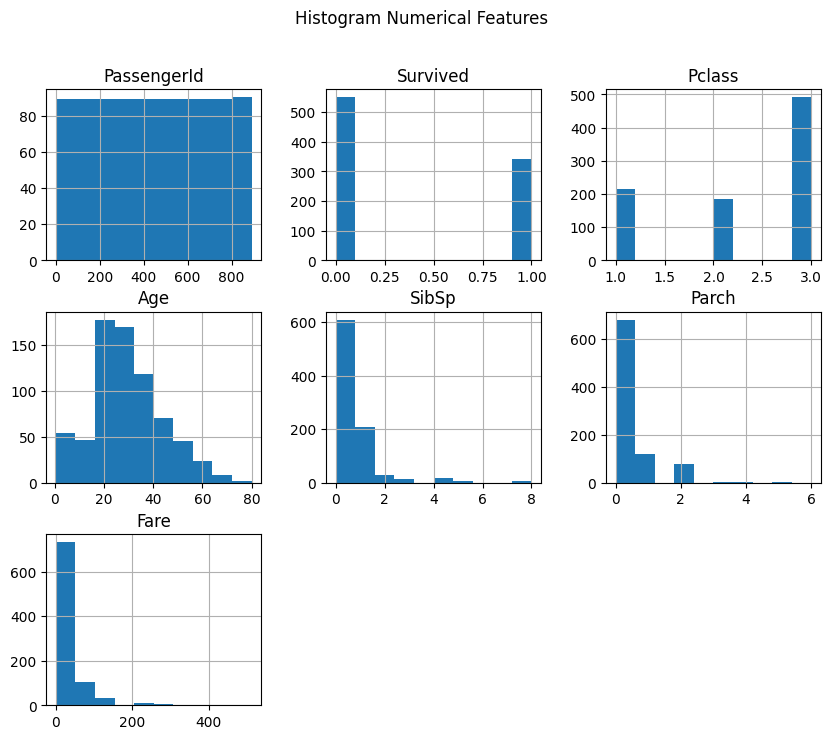

In [51]:
# 1. histogram

# numerical
numerical_col = data.select_dtypes(include=['float64', 'int64']).columns

data[numerical_col].hist(bins=10, figsize=(10,8))
plt.suptitle('Histogram Numerical Features')
plt.show()

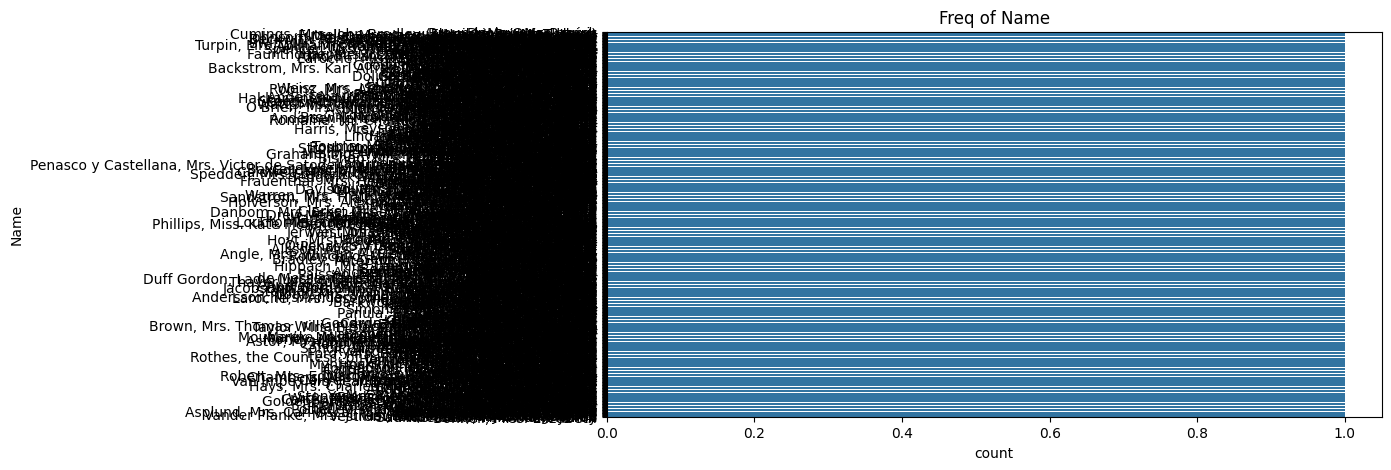

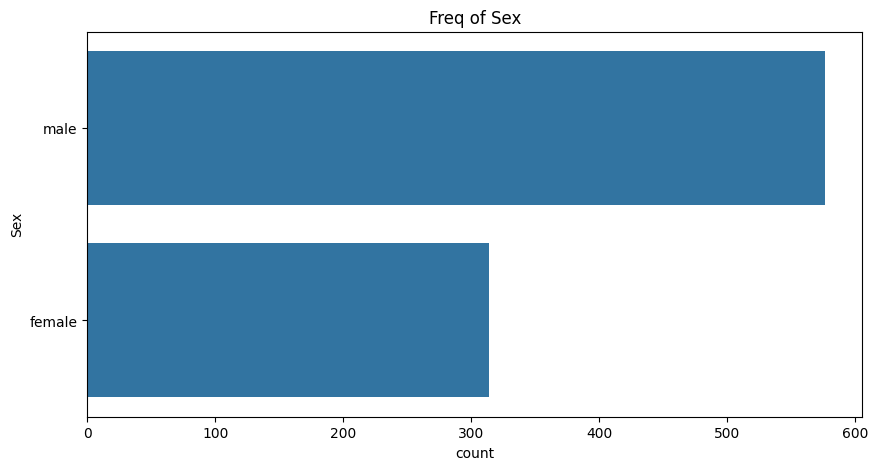

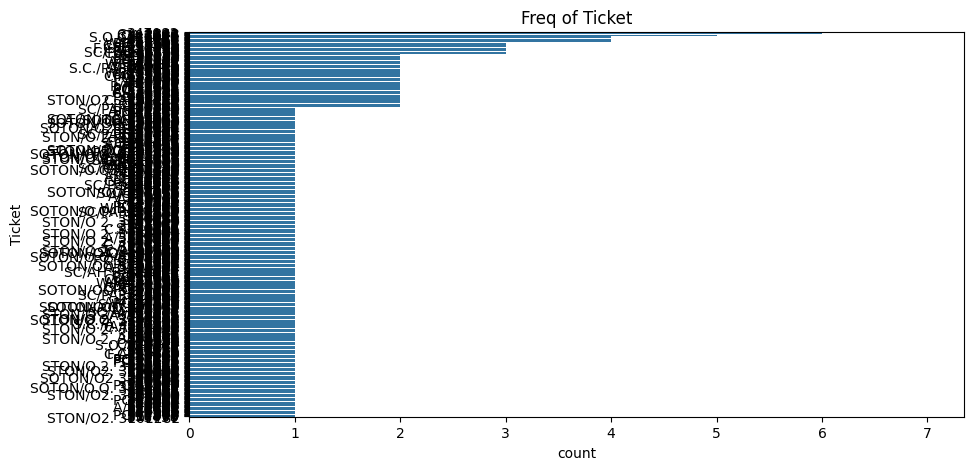

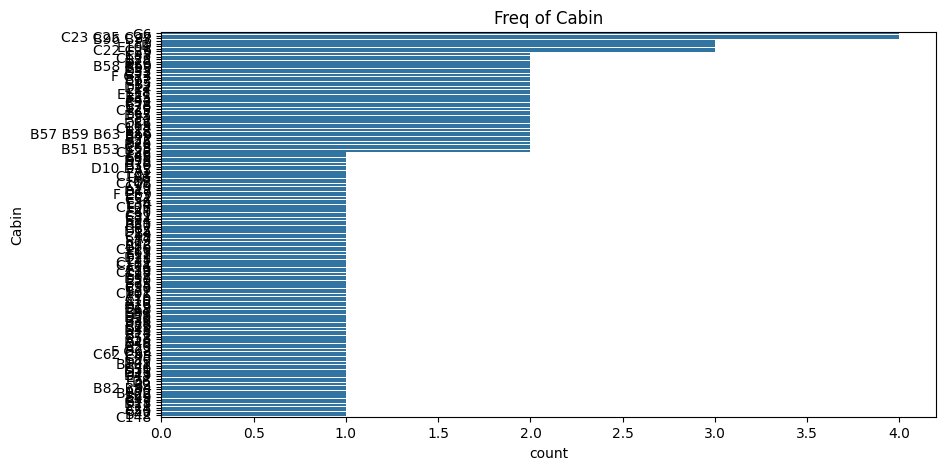

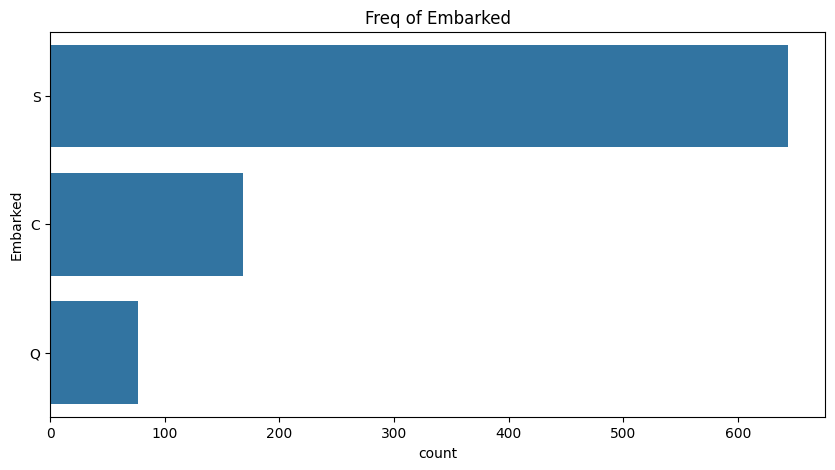

In [52]:
# categorical
categorical_col = data.select_dtypes(include='object').columns

for col in categorical_col:

    plt.figure(figsize=(10,5))

    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f'Freq of {col}')
    plt.show()

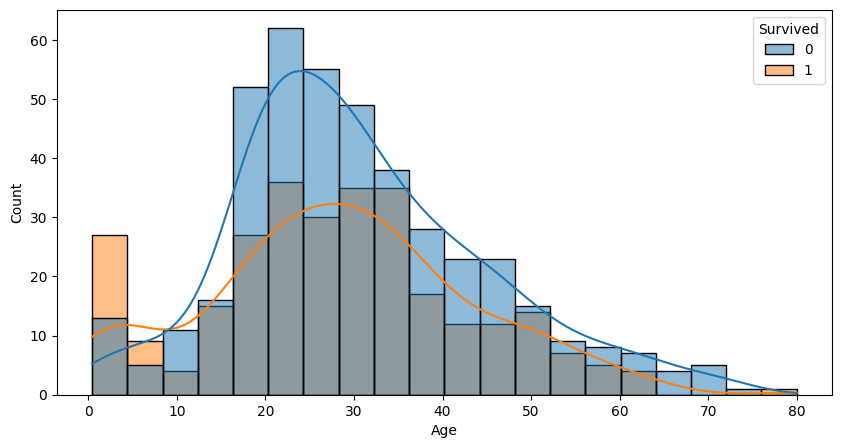

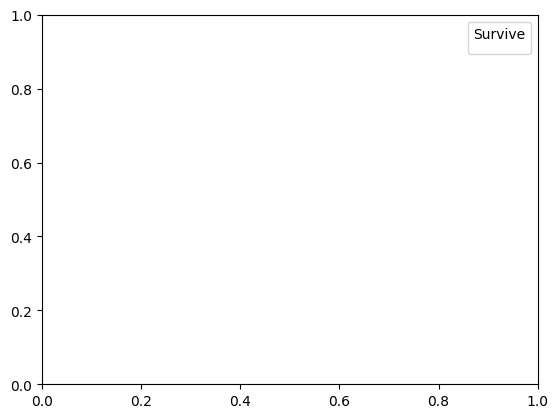

In [53]:
plt.figure(figsize=(10,5))
sns.histplot(x='Age', hue='Survived', data=data, kde=True)
plt.show()
plt.legend(title='Survive', labels=['Not Survived', 'Survived'])


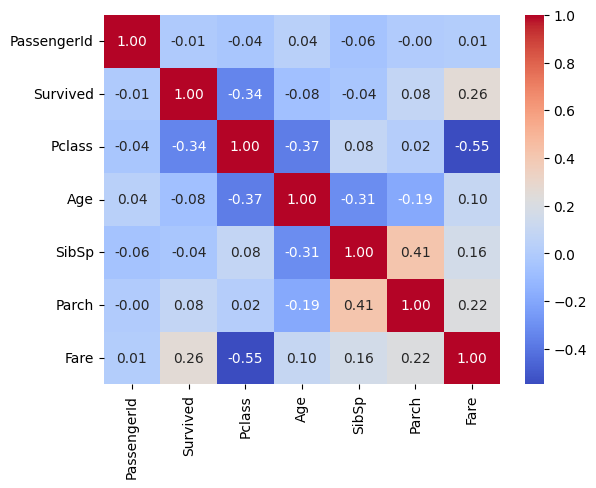

In [54]:
# correlation

corr_matrix = data[numerical_col].corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

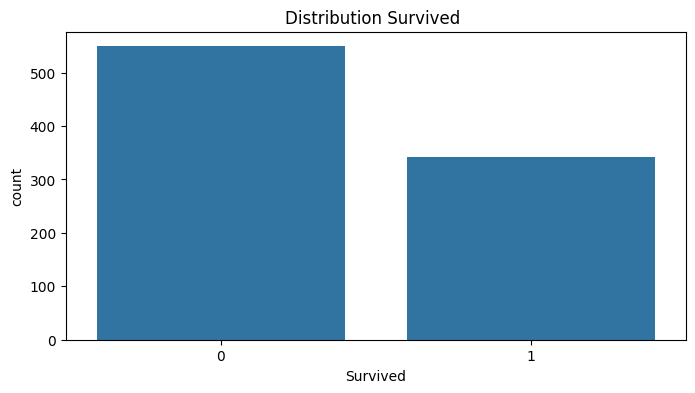

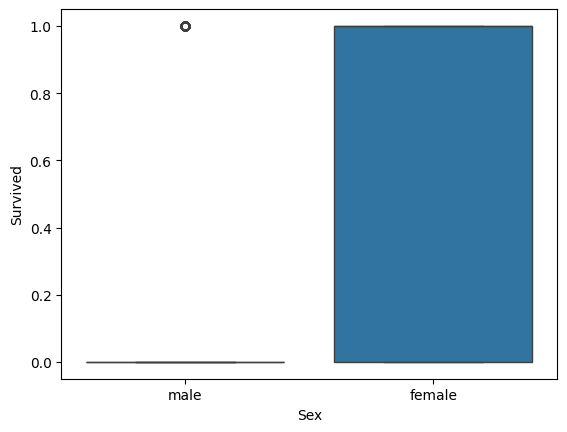

In [55]:
# output analysis

plt.figure(figsize=(8,4))
plt.title('Distribution Survived ')
sns.countplot(x=data['Survived'])
plt.show()

sns.boxplot(y='Survived', x='Sex', data=data)
plt.show()


In [56]:
# top numeric feature
corr_target = corr_matrix['Survived'].sort_values(ascending=False)

corr_target

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

### 3. preprocess - missing value, drop not relevan

In [57]:
# numerical
data.select_dtypes(include=['float64', 'int64']).isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [58]:
x_num = data.select_dtypes(include=['float64', 'int64'])

data = data.fillna(x_num.mean())

data.select_dtypes(include=['float64', 'int64']).isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [59]:
# categorical
data.select_dtypes(include='object').isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [60]:
data = data.drop(columns='Cabin')
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [61]:
x_category = data.select_dtypes(include='object')

for col in x_category:
    mode_val = data[col].mode()[0]

    data[col]=data[col].fillna(mode_val)

data.select_dtypes(include='object').isnull().sum()

C:\Users\graze\AppData\Local\Temp\ipykernel_18868\122008815.py:4: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  mode_val = data[col].mode()[0]


Name        0
Sex         0
Ticket      0
Embarked    0
dtype: int64

In [62]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [63]:
data = data.drop(columns='Name')

### 4. split & scale

In [64]:
x=data.drop(columns='Survived')
y=data['Survived']

In [65]:
x.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [67]:
x_train.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

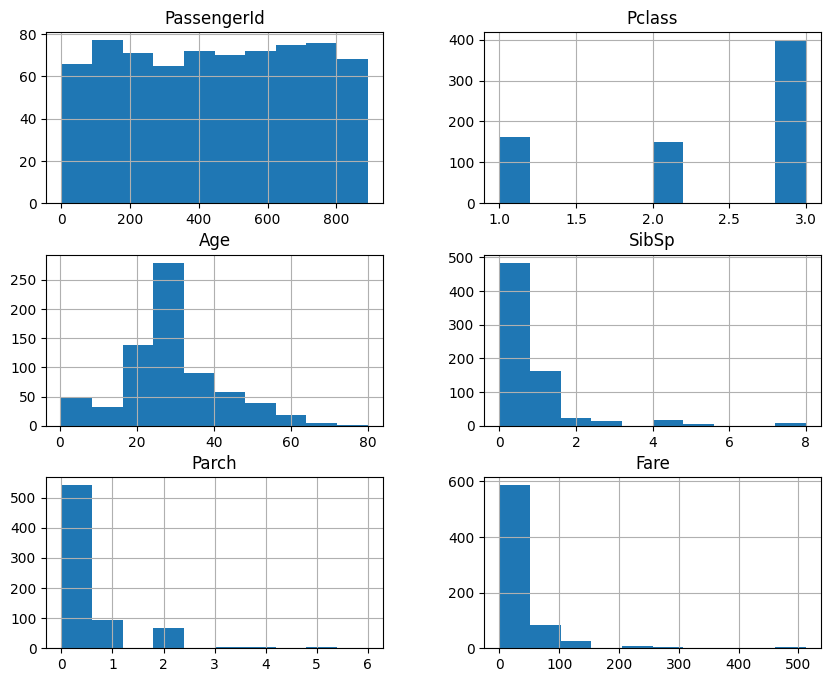

In [68]:
x_train.hist(bins=10, figsize=(10,8))

In [69]:
x_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
331,332,1,male,45.5,0,0,113043,28.5000,S
733,734,2,male,23.0,0,0,28425,13.0000,S
382,383,3,male,32.0,0,0,STON/O 2. 3101293,7.9250,S
704,705,3,male,26.0,1,0,350025,7.8542,S
813,814,3,female,6.0,4,2,347082,31.2750,S


In [70]:
le = LabelEncoder()
std = StandardScaler()
mm = MinMaxScaler()

In [71]:
# labelling encoder
for col in categorical_col:
    if col in x_train.columns:
        combine = pd.concat([x_train[col], x_test[col]], axis=0).astype(str)
        le.fit(combine)

        x_train[col] = le.transform(x_train[col].astype(str))
        x_test[col] = le.transform(x_test[col].astype(str))

In [72]:
x_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
331,332,1,1,45.5,0,0,20,28.5000,2
733,734,2,1,23.0,0,0,228,13.0000,2
382,383,3,1,32.0,0,0,665,7.9250,2
704,705,3,1,26.0,1,0,398,7.8542,2
813,814,3,0,6.0,4,2,333,31.2750,2


In [73]:
# numerical

# bell curve - std

for col in numerical_col:
    if col in x_train.columns and col == 'Age':
        x_train[col] = std.fit_transform(x_train[[col]])
        x_test[col] = std.transform(x_test[[col]])

x_train.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
331,332,1,1,1.229207,0,0,20,28.5000,2
733,734,2,1,-0.503505,0,0,228,13.0000,2
382,383,3,1,0.189580,0,0,665,7.9250,2
704,705,3,1,-0.272477,1,0,398,7.8542,2
813,814,3,0,-1.812666,4,2,333,31.2750,2


In [74]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Sex          712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Ticket       712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 55.6 KB


In [75]:
# minmax - int
list = ['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare']
for col in list:
    x_train[col] = mm.fit_transform(x_train[[col]])
    x_test[col] = mm.transform(x_test[[col]])
x_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
331,0.371910,0.0,1,1.229207,0.000,0.000000,20,0.055628,2
733,0.823596,0.5,1,-0.503505,0.000,0.000000,228,0.025374,2
382,0.429213,1.0,1,0.189580,0.000,0.000000,665,0.015469,2
704,0.791011,1.0,1,-0.272477,0.125,0.000000,398,0.015330,2
813,0.913483,1.0,0,-1.812666,0.500,0.333333,333,0.061045,2


### 5. Model & eval

In [76]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [77]:
LR = LogisticRegression()
NB = GaussianNB()

In [78]:
LR.fit(x_train, y_train)

c:\Users\graze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
NB.fit(x_train, y_train)

GaussianNB()

In [80]:
# predict
y_predLR = LR.predict(x_test)
y_predNB = NB.predict(x_test)

In [81]:
accuracy_score(y_test, y_predLR)

0.8100558659217877

In [82]:
accuracy_score(y_test, y_predNB)

0.770949720670391

In [83]:
reportLR = classification_report(y_test, y_predLR)

print(reportLR)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [84]:
reportNB = classification_report(y_test, y_predNB)

print(reportNB)

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       105
           1       0.70      0.77      0.74        74

    accuracy                           0.77       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.77      0.77       179

